In [1]:
import pandas as pd
import numpy as np

import itertools
import calendar
import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt

from datetime import date
from pandasql import sqldf

%matplotlib inline
%config InlineBackend.figure_format = 'png'

In [2]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_rows', 50)

In [3]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [4]:
#pip install pandoc

## Assignment for Applicants to the BI Reporting Analyst Position

### Your role
You are a Reporting Analyst in the Partner Services Business Insights team (central team) at Booking.com. One of your tasks is to assist account managers working in local offices around the world by providing them with actionable insights about the markets they oversee and the work they do. In addition, you will often work with other analysts and data scientists to solve more general questions that help improve the way Booking.com works, and that allow your stakeholders and peers to better understand the business.

In this assignment we ask you to answer three questions. You may use data from the datasets that we have provided you. Note that we expect your answers to be based on this dataset - **there is no need to use external data sources**. Take into account the job role of the stakeholder as you draft your answer. There is no need to include everything that you can think of, but please include all information and/or insights that you find relevant and, of course, feel free to explain why you chose to use a certain approach in a separate file.

### Output
Use any methodology and set of tools that you consider to be suitable for the task. We suggest using the tool or programming language you feel most comfortable with, and strongly prefer that your answers be submitted in a .doc(x) or .pdf file.

Note that you will not present your findings to us in person. Hence, your answer must be readable, concise and contain all the information we need to understand your points (this includes the specific names of variables you use). Please also use your time wisely.

## Tables
- Contacts and Product data (Data for RA Assessment - Operational Data.csv)
- Portfolio of ‘Account Manager 5’ (Data for RA Assessment - Portfolio.csv) 

## Description of Dataset
#### 1. Contacts and Product data
- **Property_id** - Unique id assigned to each property/hotel associated with Booking.com

- **Contact_id** - Unique id created for each contact made by the account manager with a property

- **contact_date** - Date of contact with the property

- **product** -  Name of the product

- **product_status** - Status of the product based on the contact with the property

- **contact_channel** - Mode of contact with the partner

- **office** - Office location of the account manager (geographical dimension)

- **region** - Regional director region of the account manager (geographical dimension)

- **account_manager** - Name of the account manager

#### 2. Portfolio of ‘Account Manager 5’
- **Property_id** - Unique id assigned to each property/hotel associated with Booking.com

- **account_manager** - Name of the account manager

## Downloading the Data

In [5]:
operational_data = 'Data for RA Assessment - Operational Data.csv'
portfolio = 'Data for RA Assessment - Portfolio.csv' 

In [6]:
df_operational_data = pd.read_csv(operational_data)
df_portfolio = pd.read_csv(portfolio)

## Data Processing

In [7]:
df_operational_data.head()

,property_id,contact_id,contact_date,product,product_status,contact_channel,office,region,account_manager,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,36722,12709503,2021-07-02,NaN,NaN,Messaging,Paris,EMEA,Account Manager 63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,112045,12482283,2021-06-15,NaN,NaN,Phone,Sydney,APAC,Account Manager 8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,112408,11765645,2021-04-22,NaN,NaN,Phone,Berlin,EMEA,Account Manager 51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,117227,12549651,2021-06-17,NaN,NaN,Phone,Buenos Aires,AMERICAS,Account Manager 49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,358583,11469137,2021-04-02,NaN,NaN,Messaging,Paris,EMEA,Account Manager 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df_portfolio.head()

,property_id,Account_manager
0,1897654,Account Manager 5
1,485542,Account Manager 5
2,3501466,Account Manager 5
3,469204,Account Manager 5
4,3120317,Account Manager 5


**Let's remove Null columns from df_operational_data**

In [9]:
df_operational_data.dropna(axis=1, how='all', inplace=True)
df_operational_data.drop(['Unnamed: 16'], axis=1, inplace=True)

## General information About the Data

In [10]:
dfs = {
    operational_data: df_operational_data,
    portfolio: df_portfolio
}

In [11]:
for name, df in dfs.items():
    print(name, df.shape)
    print(df.info())
    print()
    print()
    print(df.nunique())
    print()
    print()

Data for RA Assessment - Operational Data.csv (69164, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69164 entries, 0 to 69163
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   property_id      69164 non-null  int64 
 1   contact_id       69164 non-null  int64 
 2   contact_date     69164 non-null  object
 3   product          18164 non-null  object
 4   product_status   18164 non-null  object
 5   contact_channel  69164 non-null  object
 6   office           69164 non-null  object
 7   region           69163 non-null  object
 8   account_manager  69164 non-null  object
dtypes: int64(2), object(7)
memory usage: 4.7+ MB
None


property_id        17719
contact_id         65011
contact_date         128
product                4
product_status         5
contact_channel        2
office                10
region                 3
account_manager       87
dtype: int64


Data for RA Assessment - Portfolio.csv (222

**Categorical Data**

In [12]:
for colname in df_operational_data.select_dtypes(include='object').columns:
    print(str(colname) + '\n\n' + str(df_operational_data[colname].value_counts()) + '\n' + '-' * 50 + '\n')

contact_date

2021-07-05    1503
2021-06-02    1424
2021-07-01    1362
2021-07-06    1326
2021-07-27    1278
              ... 
2021-05-28       3
2021-08-07       3
2021-06-19       3
2021-08-11       3
2021-07-10       2
Name: contact_date, Length: 128, dtype: int64
--------------------------------------------------

product

Product 3    7097
Product 1    6119
Product 4    3130
Product 2    1818
Name: product, dtype: int64
--------------------------------------------------

product_status

Product Offered to Property    6472
Property is not Interested     6221
Property is Interested         2606
Product Implemented            2014
Awaiting Property Decision      851
Name: product_status, dtype: int64
--------------------------------------------------

contact_channel

Phone        35428
Messaging    33736
Name: contact_channel, dtype: int64
--------------------------------------------------

office

Tokyo             16287
Amsterdam         10231
Bangkok            9157
Berlin      

**Data Gaps**

In [13]:
df_operational_data.isna().sum()

property_id            0
contact_id             0
contact_date           0
product            51000
product_status     51000
contact_channel        0
office                 0
region                 1
account_manager        0
dtype: int64

In [14]:
df_portfolio.isna().sum()

property_id        0
Account_manager    0
dtype: int64

## Question 1:

“Dear Colleague,
As an account manager I am responsible for contacting my portfolio (partners assigned to me) every quarter and offering products that can help these partners increase their performance. I am an Account Manager (‘Account Manager 5’ in the dataset) in APAC and as a mid quarter check in, I would like to see how I have performed so far in this quarter and what are the focus areas for the rest of the quarter.”
1. How would you rate the performance* of this Account Manager so far and what would you recommend for the remaining quarter?
2. How did you get to this recommendation? What metrics and/or factors did you look at and why?
3. How would you best present this information to the Account Manager?

*For rating performance look at the metrics*:

- **Number of contacts with partners (Contacts)**: how many times Account Managers are contacting partners.
- **Number of products offered (Products Offered)**: how many times products are offered in partner contacts.

### Let's check the main metrics

In [15]:
query = """ 

WITH Contacts AS (
SELECT 
    account_manager,
    unique_partners,
    count_contacts_with_partners,
    count_unique_contacts_with_partners,
    contacted,
    product_offered
FROM (
SELECT 
    account_manager,
    COUNT(DISTINCT contact_id) as count_unique_contacts_with_partners,
    COUNT(contact_id) as count_contacts_with_partners,
    COUNT(DISTINCT property_id) as unique_partners,
    COUNT(product_status) as contacted,
    SUM(CASE WHEN product_status = 'Product Offered to Property' THEN 1 END) product_offered
FROM df_operational_data
GROUP BY account_manager)
),
Products_Offered AS (
SELECT 
    account_manager,
    region,
    count(product) as quantity_of_offered_products
FROM
    (
    SELECT 
        account_manager,
        region,
        property_id,
        product,
        COUNT(contact_id) as contacts_count
    FROM df_operational_data
    WHERE product_status = 'Product Offered to Property' 
    GROUP BY account_manager, property_id, product
    ) total_quantity_of_products
GROUP BY account_manager
)
SELECT 
    c.account_manager, 
    po.region,
    c.unique_partners, 
    c.count_contacts_with_partners, 
    c.count_unique_contacts_with_partners,
    c.contacted,
    c.product_offered,
    po.quantity_of_offered_products
    
FROM Contacts c
LEFT JOIN Products_Offered po ON c.account_manager = po.account_manager

"""
df = sqldf(query) 
df.head()

,account_manager,region,unique_partners,count_contacts_with_partners,count_unique_contacts_with_partners,contacted,product_offered,quantity_of_offered_products
0,Account Manager 1,None,217,984,971,78,NaN,NaN
1,Account Manager 10,APAC,279,1010,991,147,53.00,46.00
2,Account Manager 11,APAC,144,605,546,189,45.00,40.00
3,Account Manager 12,AMERICAS,195,652,566,287,127.00,97.00
4,Account Manager 13,APAC,144,701,671,162,49.00,45.00


**Definition of the new table - User's funnel way**
- account_manager	

- unique_partners - Unique partners for each Account Manager

- count_contacts_with_partners - Attemps of contact to partner and offering few product via one attempt

- count_unique_contacts_with_partners - Distinct attemps of contact to partner

- contacted - Successfully contacted and delivered the offer

- product_offered - how many times products are offered in partner contacts (status=Products Offered)

- quantity_of_offered_products - How many products Account Manager offered to each partner via all contacts

**Unique contacts and The quantity of the contacts could differ, because sometimes Account Manager offer different products to the same client at the same date**

**This is Outcome of the Account Manager 5**

In [16]:
df['%_successful_offered'] = df['product_offered'] / df['contacted']

In [17]:
df[df['account_manager'] == 'Account Manager 5'].reset_index(drop = True)

,account_manager,region,unique_partners,count_contacts_with_partners,count_unique_contacts_with_partners,contacted,product_offered,quantity_of_offered_products,%_successful_offered
0,Account Manager 5,APAC,159,688,650,168,46.00,40.00,0.27


In [18]:
# Let's check only performing metrics
df_res = df[['account_manager', 'contacted', 'product_offered', '%_successful_offered', 'region']]

df_res.head()

,account_manager,contacted,product_offered,%_successful_offered,region
0,Account Manager 1,78,NaN,NaN,None
1,Account Manager 10,147,53.00,0.36,APAC
2,Account Manager 11,189,45.00,0.24,APAC
3,Account Manager 12,287,127.00,0.44,AMERICAS
4,Account Manager 13,162,49.00,0.30,APAC


In [19]:
# in percentages - 52 Place out of 87

tdf = df_res.sort_values(by='%_successful_offered', ignore_index=True, ascending=False)
tdf[tdf['account_manager'] == 'Account Manager 5'].index[0], tdf.shape[0]

(52, 87)

In [20]:
# absolute values by Contacted - 46 Place out of 87

tdf0 = df_res.sort_values(by='contacted', ignore_index=True, ascending=False)
tdf0[tdf0['account_manager'] == 'Account Manager 5'].index[0], tdf0.shape[0]

(46, 87)

In [21]:
# absolute values by Product offered - 51 Place out of 87

tdf1 = df_res.sort_values(by='product_offered', ignore_index=True, ascending=False)
tdf1[tdf1['account_manager'] == 'Account Manager 5'].index[0], tdf1.shape[0]

(51, 87)

In [22]:
# We could see, that Account Manager 5 performs average / under average

**Let's check some anomalies in contacting partners from portfolio of Account Manager 5**

In [23]:
# This is total unique partners in portfolio for
df_portfolio['property_id'].nunique()

222

In [24]:
tdf = df_operational_data[['property_id', 'account_manager']]
tdf = tdf.groupby(['property_id', 'account_manager'], as_index=False).count()
tdf['in_portfolio'] = tdf['property_id'].apply(lambda a: a in df_portfolio['property_id'].values)
tdf.head()

,property_id,account_manager,in_portfolio
0,17984,Account Manager 4,False
1,18026,Account Manager 60,False
2,18073,Account Manager 63,False
3,18076,Account Manager 60,False
4,18076,Account Manager 63,False


In [25]:
manager_5_stat = tdf[tdf['account_manager'] == 'Account Manager 5']
manager_5_stat.shape[0], manager_5_stat['in_portfolio'].sum()

(159, 136)

**We could see, that Account Manager 5 called only 136 partners from portfolio, this is 61%**

In [26]:
round(136/222, 2)

0.61

**Also we could notice, that Manager contacted to someone's else partners**

In [27]:
159-136

23

## Question 2:

“Dear Colleague,
As the Managing Director of APAC, I am responsible for steering the region’s growth and performance. For the past few quarters I have relied on some reports which showcase the following metrics for this purpose: products offered and contacts.”
1. Which other metrics (from the dataset provided) would you suggest to the MD to assess the region’s performance and why?
2. The MD needs to present his region’s performance to the VP. How would your report look to accomplish his goal?

In [28]:
grouped_df = df.groupby(by='region', as_index=False).agg(
    n_account_managers=pd.NamedAgg(column='account_manager', aggfunc='count'),
    n_unique_partners=pd.NamedAgg(column='unique_partners', aggfunc='sum'),
    n_contacts_with_partners=pd.NamedAgg(column='count_contacts_with_partners', aggfunc='sum'),
    n_contacted=pd.NamedAgg(column='contacted', aggfunc='sum'),
    n_product_offered=pd.NamedAgg(column='product_offered', aggfunc='sum'),
    n_unique_offered_products=pd.NamedAgg(column='quantity_of_offered_products', aggfunc='sum')
)    

**Standart metrics: products offered and contacts**

In [29]:
grouped_df[['region', 'n_contacted', 'n_product_offered']]

,region,n_contacted,n_product_offered
0,AMERICAS,3810,1628.00
1,APAC,6652,1604.00
2,EMEA,7439,3240.00


### Let's implement other important metrics

In [30]:
tdf0 = grouped_df[['region', 'n_contacted', 'n_product_offered', 'n_account_managers']]
tdf0['offered/contacted'] = tdf0['n_product_offered'] / tdf0['n_contacted']
tdf0['avg_contacted_per_manager'] = tdf0['n_contacted'] / tdf0['n_account_managers']
tdf0['avg_offered_per_manager'] = tdf0['n_product_offered'] / tdf0['n_account_managers']


tdf0.sort_values(by='offered/contacted', ignore_index=True, ascending=False)

,region,n_contacted,n_product_offered,n_account_managers,offered/contacted,avg_contacted_per_manager,avg_offered_per_manager
0,EMEA,7439,3240.00,29,0.44,256.52,111.72
1,AMERICAS,3810,1628.00,25,0.43,152.40,65.12
2,APAC,6652,1604.00,31,0.24,214.58,51.74


We could see, that **APAC has the lowest conversion from contacted to offered**. But on the stage of contacting Managers in APAC have good results, so there is some anomaly after contacting to offering

In [31]:
df_operational_data.groupby(['region', 'contact_channel']).size().reset_index(name='cnt') \
    .sort_values(by='cnt', ignore_index=True, ascending=False)

,region,contact_channel,cnt
0,EMEA,Phone,17404
1,APAC,Messaging,17301
2,APAC,Phone,12117
3,EMEA,Messaging,9332
4,AMERICAS,Messaging,7103
5,AMERICAS,Phone,5906


**We could see, that manageres in APAC use Messaging mostly insteed the Phone.**. In EMEA Region managers use Phone and they have the highest performance in offering after contacting

In [32]:
grouped_df['contacted/n_contacts'] = grouped_df['n_contacted'] / grouped_df['n_contacts_with_partners']

grouped_df[['region', 'n_contacts_with_partners','n_contacted','contacted/n_contacts']]

,region,n_contacts_with_partners,n_contacted,contacted/n_contacts
0,AMERICAS,13010,3810,0.29
1,APAC,28434,6652,0.23
2,EMEA,25047,7439,0.30


**Also there is a problem in a step contactacting to contacted in APAC**, I think it could be fixed after changing the way of messaging

In [33]:
query = """ 

WITH Contacts AS (

SELECT 
    region,
    contact_channel,
    COUNT(contact_id) as count_contacts_with_partners,
    COUNT(product_status) as contacted,
    SUM(CASE WHEN product_status = 'Product Offered to Property' THEN 1 END) product_offered
FROM df_operational_data
GROUP BY region, contact_channel
)
SELECT * FROM Contacts c

"""
df1 = sqldf(query) 
df1.sort_values(by='contacted', ignore_index=True, ascending=False)

,region,contact_channel,count_contacts_with_partners,contacted,product_offered
0,EMEA,Phone,17404,7572,3212
1,APAC,Phone,12117,5935,1116
2,AMERICAS,Phone,5906,3579,1423
3,APAC,Messaging,17301,795,488
4,AMERICAS,Messaging,7103,230,204
5,EMEA,Messaging,9332,52,28
6,None,Phone,1,1,1


In [34]:
query = """ 

WITH Contacts AS (
SELECT 
    region,
    office,
    contact_channel,
    COUNT(contact_id) as count_contacts_with_partners,
    COUNT(product_status) as contacted,
    SUM(CASE WHEN product_status = 'Product Offered to Property' THEN 1 END) product_offered
FROM df_operational_data
GROUP BY region, office 
)
SELECT * FROM Contacts c

"""
df2 = sqldf(query) 
df2.sort_values(by='product_offered', ignore_index=True, ascending=False)

,region,office,contact_channel,count_contacts_with_partners,contacted,product_offered
0,EMEA,Berlin,Phone,8825,3825,1686.00
1,EMEA,Amsterdam,Phone,10231,2360,1349.00
2,APAC,Tokyo,Phone,16287,2484,769.00
3,AMERICAS,Buenos Aires,Phone,4239,1349,701.00
4,APAC,Bangkok,Messaging,9157,3122,655.00
5,AMERICAS,Rio de Janeiro,Messaging,5801,1614,638.00
6,AMERICAS,Cancun,Phone,2969,846,288.00
7,EMEA,Paris,Messaging,7680,1439,205.00
8,APAC,Sydney,Phone,3973,1123,180.00
9,None,Buenos Aires,Phone,1,1,1.00


In [35]:
df2['offered/contacted'] = df2['product_offered'] / df2['contacted']

**The best way to offer products is by PHONE**

In [36]:
df2.sort_values(by='offered/contacted', ignore_index=True, ascending=False)

,region,office,contact_channel,count_contacts_with_partners,contacted,product_offered,offered/contacted
0,None,Buenos Aires,Phone,1,1,1.00,1.00
1,EMEA,Amsterdam,Phone,10231,2360,1349.00,0.57
2,AMERICAS,Buenos Aires,Phone,4239,1349,701.00,0.52
3,EMEA,Berlin,Phone,8825,3825,1686.00,0.44
4,AMERICAS,Rio de Janeiro,Messaging,5801,1614,638.00,0.40
5,AMERICAS,Cancun,Phone,2969,846,288.00,0.34
6,APAC,Tokyo,Phone,16287,2484,769.00,0.31
7,APAC,Bangkok,Messaging,9157,3122,655.00,0.21
8,APAC,Sydney,Phone,3973,1123,180.00,0.16
9,EMEA,Paris,Messaging,7680,1439,205.00,0.14


**The most performed offices in APAC**

In [37]:
query = """ 

WITH Contacts AS (
SELECT 
    region,
    office,
    COUNT(contact_id) as count_contacts_with_partners,
    COUNT(product_status) as contacted,
    SUM(CASE WHEN product_status = 'Product Offered to Property' THEN 1 END) product_offered
FROM df_operational_data
WHERE region = 'APAC'
GROUP BY region, office 
)
SELECT * FROM Contacts c

"""
df3 = sqldf(query) 
df3['offered/contacted'] = df3['product_offered'] / df3['contacted']
df3.sort_values(by='product_offered', ignore_index=True, ascending=False)

,region,office,count_contacts_with_partners,contacted,product_offered,offered/contacted
0,APAC,Tokyo,16287,2484,769.00,0.31
1,APAC,Bangkok,9157,3122,655.00,0.21
2,APAC,Sydney,3973,1123,180.00,0.16
3,APAC,Tõkyo,1,1,NaN,NaN


**Let's look at the activity by months**

In [38]:
def month_extractor(date_string):
    return date.fromisoformat(date_string).month

In [39]:
def month_name_extractor(date_string):
    return calendar.month_name[date.fromisoformat(date_string).month]

In [40]:
tdf = df_operational_data.copy()
tdf['month'] = tdf['contact_date'].apply(month_extractor)
tdf['month_name'] = tdf['contact_date'].apply(month_name_extractor)
tdf.head()

,property_id,contact_id,contact_date,product,product_status,contact_channel,office,region,account_manager,month,month_name
0,36722,12709503,2021-07-02,NaN,NaN,Messaging,Paris,EMEA,Account Manager 63,7,July
1,112045,12482283,2021-06-15,NaN,NaN,Phone,Sydney,APAC,Account Manager 8,6,June
2,112408,11765645,2021-04-22,NaN,NaN,Phone,Berlin,EMEA,Account Manager 51,4,April
3,117227,12549651,2021-06-17,NaN,NaN,Phone,Buenos Aires,AMERICAS,Account Manager 49,6,June
4,358583,11469137,2021-04-02,NaN,NaN,Messaging,Paris,EMEA,Account Manager 4,4,April


In [41]:
tdf.groupby(['month', 'month_name']).size().reset_index(name='cnt')

,month,month_name,cnt
0,4,April,18061
1,5,May,14076
2,6,June,11799
3,7,July,19682
4,8,August,5546


<Axes: xlabel='contact_date'>

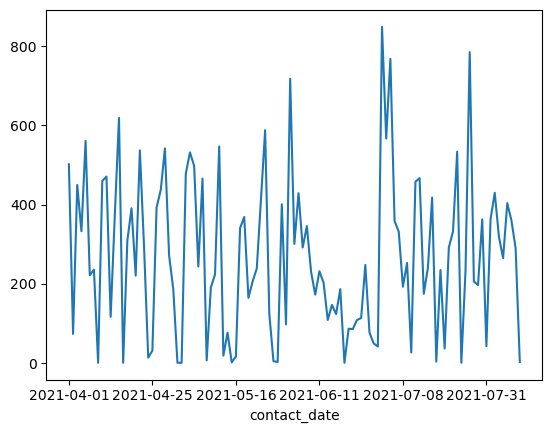

In [42]:
tdf[tdf['region']=='APAC'].groupby(['contact_date']).size().plot()

In [43]:
tdf['contact_date'].max()

'2021-08-11'

**There are two values of lowest quantity of contacts - in August, because the last day of dataset is 2021-08-11 and some anomaly in June**

**Number of contacts per day has no trend and it is not stable, so there is no need to investigate it more**

## Graphs

In [44]:
df1

,region,contact_channel,count_contacts_with_partners,contacted,product_offered
0,None,Phone,1,1,1
1,AMERICAS,Messaging,7103,230,204
2,AMERICAS,Phone,5906,3579,1423
3,APAC,Messaging,17301,795,488
4,APAC,Phone,12117,5935,1116
5,EMEA,Messaging,9332,52,28
6,EMEA,Phone,17404,7572,3212


array([<Axes: ylabel='(count_contacts_with_partners, AMERICAS)'>,
       <Axes: ylabel='(count_contacts_with_partners, APAC)'>,
       <Axes: ylabel='(count_contacts_with_partners, EMEA)'>],
      dtype=object)

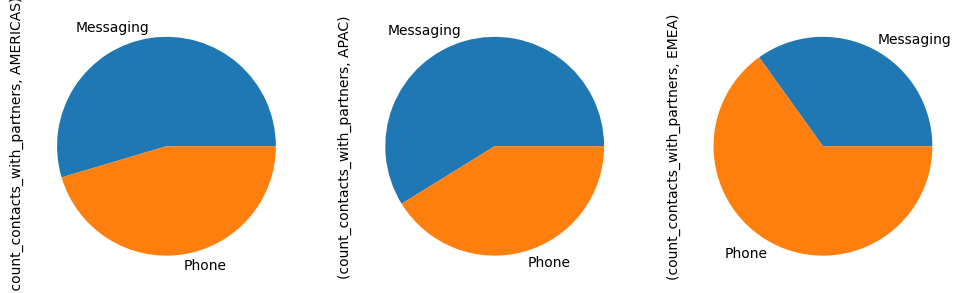

In [45]:
df1.iloc[1:][['region', 'contact_channel', 'count_contacts_with_partners']] \
    .set_index('contact_channel') \
    .pivot(columns=['region']) \
    .plot.pie(subplots=True, figsize=(12,6), legend=False)

<Axes: xlabel='region'>

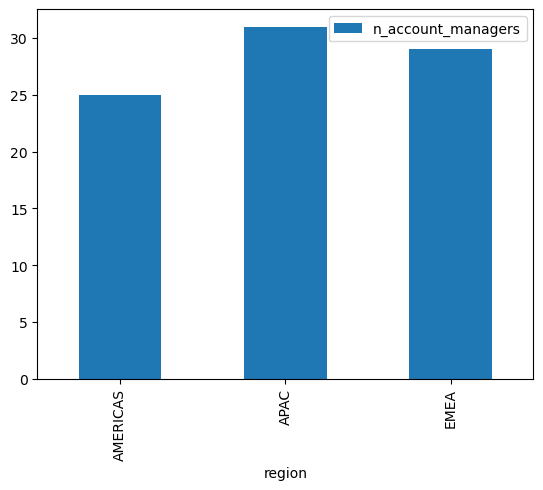

In [46]:
tdf0.plot.bar(x='region', y=['n_account_managers'])

<Axes: xlabel='region'>

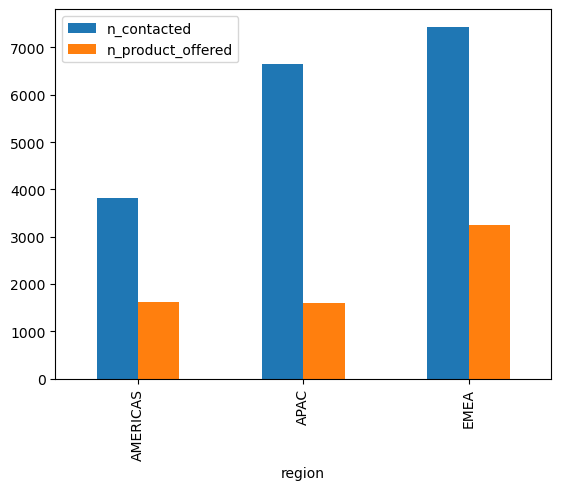

In [47]:
tdf0.plot.bar(x='region', y=['n_contacted', 'n_product_offered'])

<Axes: xlabel='region'>

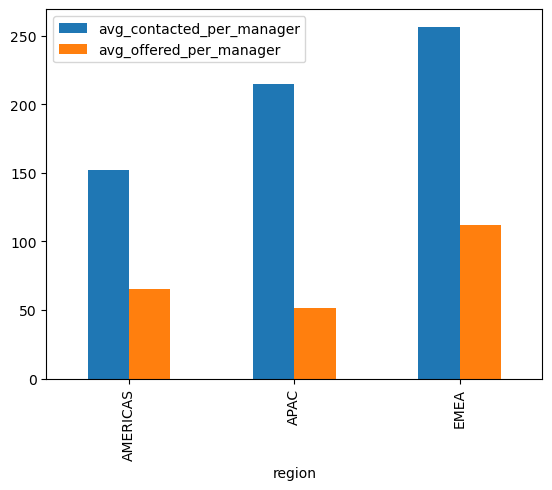

In [48]:
tdf0.plot.bar(x='region', y=['avg_contacted_per_manager', 'avg_offered_per_manager'])

<Axes: xlabel='region'>

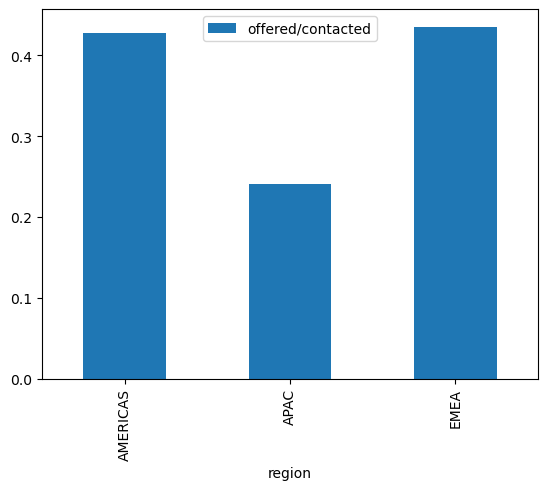

In [49]:
tdf0.plot.bar(x='region', y=['offered/contacted'])

## Question 3: Free Response

What additional insights can you derive from the provided dataset?

Please feel free to look into and explore anything that seems interesting to you. Share your findings with the analytics team, which comprises both analysts and business stakeholders.

**We could build some extra values for user's funnel**

In [50]:
query = """ 
SELECT 
    account_manager,
    unique_partners,
    count_contacts,
    successful_contact,
    
    partner_not_interested,
    partner_interested,
    product_implemented,
    awaiting_property_decision,
    
    product_offered_property
FROM (
SELECT 
    account_manager,
    COUNT(contact_id) as count_contacts,
    COUNT(DISTINCT property_id) as unique_partners,
    COUNT(product_status) as successful_contact,
    SUM(CASE WHEN product_status = 'Property is not Interested' THEN 1 END) partner_not_interested,
    SUM(CASE WHEN product_status = 'Property is Interested' THEN 1 END) partner_interested,
    SUM(CASE WHEN product_status = 'Product Implemented' THEN 1 END) product_implemented,
    SUM(CASE WHEN product_status = 'Product Offered to Property' THEN 1 END) product_offered_property,
    SUM(CASE WHEN product_status = 'Awaiting Property Decision' THEN 1 END) awaiting_property_decision
FROM df_operational_data
GROUP BY account_manager
)t
"""
sqldf(query)

,account_manager,unique_partners,count_contacts,successful_contact,partner_not_interested,partner_interested,product_implemented,awaiting_property_decision,product_offered_property
0,Account Manager 1,217,984,78,43.00,4.00,26.00,5.00,NaN
1,Account Manager 10,279,1010,147,22.00,15.00,51.00,6.00,53.00
2,Account Manager 11,144,605,189,84.00,8.00,38.00,14.00,45.00
3,Account Manager 12,195,652,287,46.00,14.00,91.00,9.00,127.00
4,Account Manager 13,144,701,162,79.00,13.00,17.00,4.00,49.00
...,...,...,...,...,...,...,...,...,...
82,Account Manager 84,592,1689,185,29.00,116.00,32.00,8.00,NaN
83,Account Manager 85,192,304,111,19.00,12.00,26.00,NaN,54.00
84,Account Manager 86,190,873,374,69.00,57.00,33.00,5.00,210.00
85,Account Manager 87,288,655,259,28.00,75.00,58.00,1.00,97.00


**And I noticed, that sometimes Manager 5 tried to offer Products to the Partners, that already choosen it before.**
It could be ok, if the Product is seasonal and has restricted time of use, but if no - it is the waste of Manager's time

In [51]:
df_check = df_operational_data[df_operational_data['account_manager'] == 'Account Manager 5'] \
    .reset_index(drop = True)

df_check.groupby('property_id').size().reset_index(name='cnt') \
    .sort_values(by='cnt', ignore_index=True, ascending=False)[:5]

,property_id,cnt
0,2751757,11
1,6033260,11
2,1990175,10
3,4464256,10
4,2824966,10


In [52]:
df_check[(df_check['property_id'] == 2751757) & (df_check['product'] == 'Product 1')] \
    .sort_values(by='contact_date', ignore_index=True, ascending=False)

,property_id,contact_id,contact_date,product,product_status,contact_channel,office,region,account_manager
0,2751757,13205799,2021-08-05,Product 1,Property is not Interested,Phone,Tokyo,APAC,Account Manager 5
1,2751757,12147798,2021-05-19,Product 1,Property is not Interested,Phone,Tokyo,APAC,Account Manager 5
2,2751757,11795205,2021-04-25,Product 1,Product Offered to Property,Phone,Tokyo,APAC,Account Manager 5


In [53]:
df_check[(df_check['property_id'] == 2751757) & (df_check['product'] == 'Product 4')] \
     .sort_values(by='contact_date', ignore_index=True, ascending=False)

,property_id,contact_id,contact_date,product,product_status,contact_channel,office,region,account_manager
0,2751757,13205799,2021-08-05,Product 4,Property is not Interested,Phone,Tokyo,APAC,Account Manager 5
1,2751757,13165423,2021-08-03,Product 4,Property is not Interested,Messaging,Tokyo,APAC,Account Manager 5
2,2751757,12147798,2021-05-19,Product 4,Property is not Interested,Phone,Tokyo,APAC,Account Manager 5
3,2751757,11795205,2021-04-25,Product 4,Product Offered to Property,Phone,Tokyo,APAC,Account Manager 5
